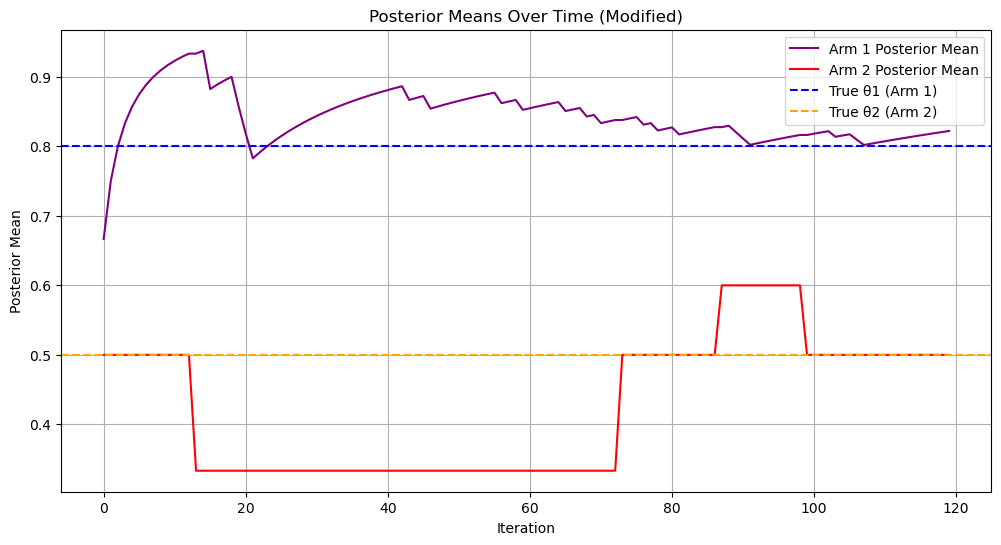

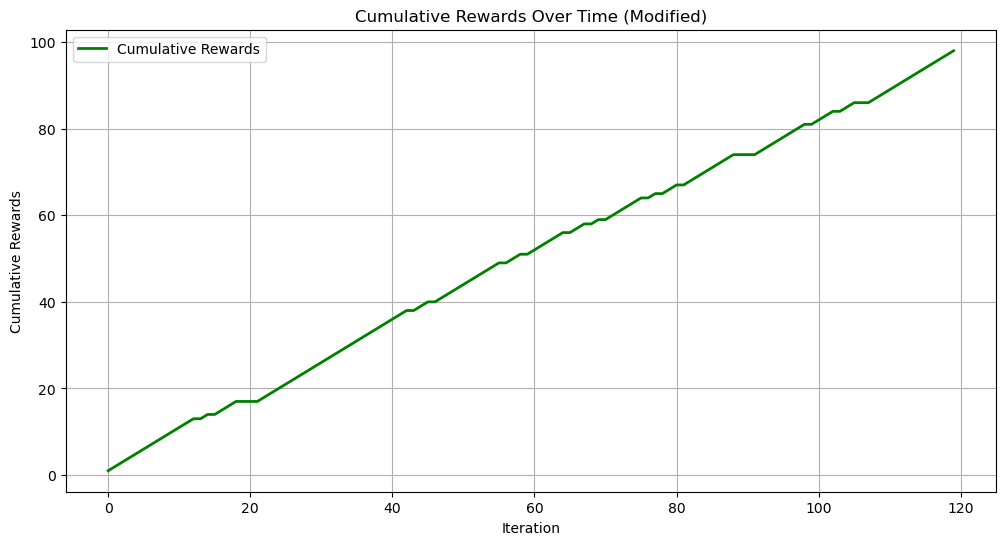

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Initialize parameters with modified numbers
np.random.seed(123)  # Set a random seed for reproducibility
num_arms = 2  # Number of arms (j=1, 2)
true_thetas = [0.8, 0.5]  # Modified true success probabilities for each arm
num_iterations = 120  # Modified number of time steps
alpha = np.ones(num_arms)  # Initial alpha parameters (successes + 1)
beta = np.ones(num_arms)  # Initial beta parameters (failures + 1)

# To track results
choices = []  # Which arm is chosen at each step
rewards = []  # Reward (0 or 1) at each step
posterior_history = []  # To visualize posterior distributions

# Step 2: Run the algorithm
for t in range(num_iterations):
    # Sample from the Beta posterior for each arm
    sampled_thetas = [np.random.beta(alpha[j], beta[j]) for j in range(num_arms)]
    
    # Choose the arm with the highest sampled theta
    chosen_arm = np.argmax(sampled_thetas)
    choices.append(chosen_arm)
    
    # Simulate reward from the chosen arm
    reward = np.random.rand() < true_thetas[chosen_arm]  
    rewards.append(reward)
    
    # Update posterior for the chosen arm
    alpha[chosen_arm] += reward  # Add success to alpha
    beta[chosen_arm] += 1 - reward  # Add failure to beta
    
    # Store posterior distributions for visualization
    posterior_history.append((alpha.copy(), beta.copy()))

# Step 3: Visualize the results
# Plot the posterior distributions over time
plt.figure(figsize=(12, 6))
for arm in range(num_arms):
    plt.plot(
        [posterior[0][arm] / (posterior[0][arm] + posterior[1][arm]) 
         for posterior in posterior_history],
        label=f"Arm {arm+1} Posterior Mean",
        color="purple" if arm == 0 else "red"
    )
plt.axhline(y=true_thetas[0], color="blue", linestyle="--", label="True θ1 (Arm 1)")
plt.axhline(y=true_thetas[1], color="orange", linestyle="--", label="True θ2 (Arm 2)")
plt.xlabel("Iteration")
plt.ylabel("Posterior Mean")
plt.title("Posterior Means Over Time (Modified)")
plt.legend()
plt.grid()
plt.show()

# Plot cumulative rewards
plt.figure(figsize=(12, 6))
cumulative_rewards = np.cumsum(rewards)  # Compute cumulative rewards
plt.plot(cumulative_rewards, label="Cumulative Rewards", color="green", linewidth=2)
plt.xlabel("Iteration")
plt.ylabel("Cumulative Rewards")
plt.title("Cumulative Rewards Over Time (Modified)")
plt.legend()
plt.grid()
plt.show()

plt.show()
